In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from prophet import Prophet
import plotly.express as px
import numpy as np

# Set plot style
sns.set(style='whitegrid')


In [21]:
df = pd.read_csv('/content/Sample - Superstore.csv',encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Additional features
df['Month_Year'] = df['Order Date'].dt.to_period('M')
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days
# Show first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month_Year,Shipping Time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10,7


In [11]:
# Check for nulls
print("Missing values:\n", df.isnull().sum())

# Convert Order Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create Month-Year column
df['Month_Year'] = df['Order Date'].dt.to_period('M')

# View basic info
df.info()


Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   

<ipython-input-12-1b10dab39693>:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


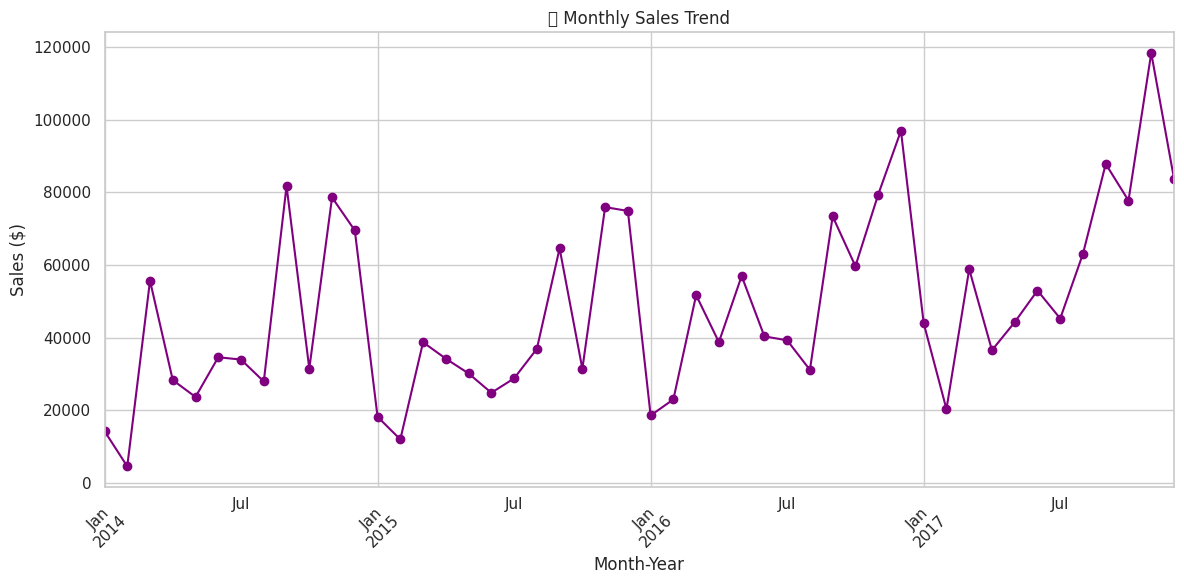

In [12]:
monthly_sales = df.groupby('Month_Year')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('📈 Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


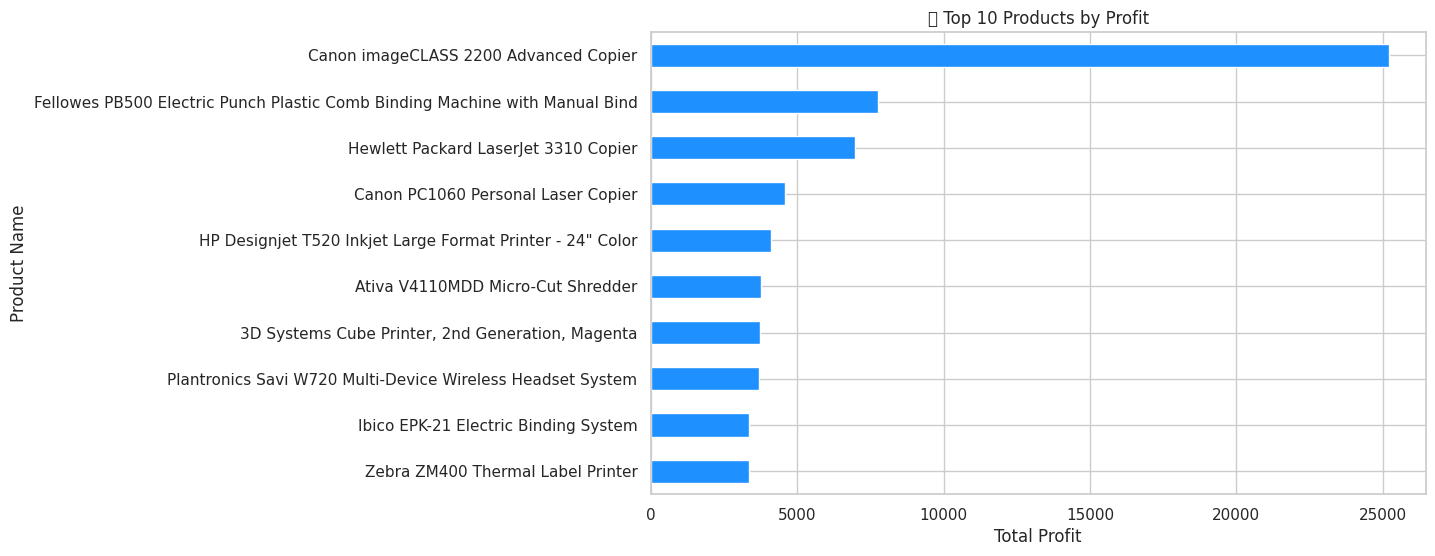

In [13]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='dodgerblue')
plt.title('🏆 Top 10 Products by Profit')
plt.xlabel('Total Profit')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


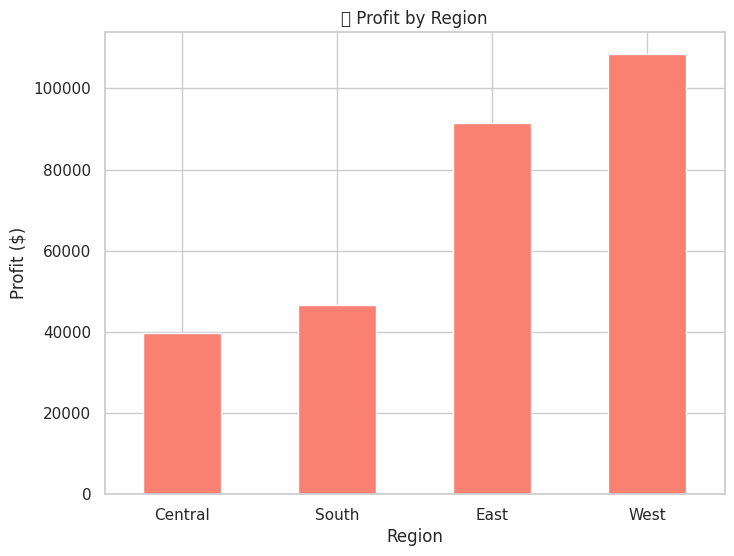

In [14]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()

plt.figure(figsize=(8,6))
region_profit.plot(kind='bar', color='salmon')
plt.title('🌍 Profit by Region')
plt.ylabel('Profit ($)')
plt.xticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


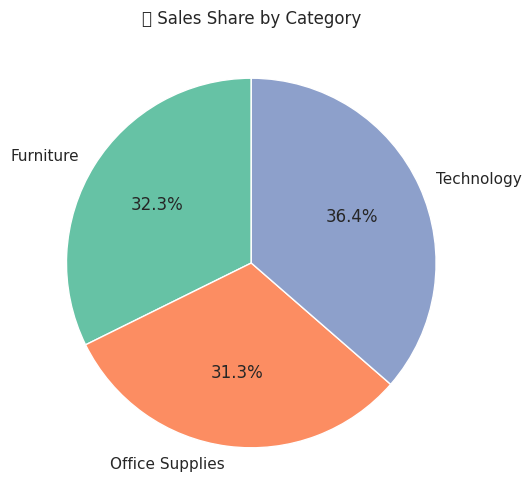

In [15]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(6,6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('📦 Sales Share by Category')
plt.ylabel('')
plt.show()


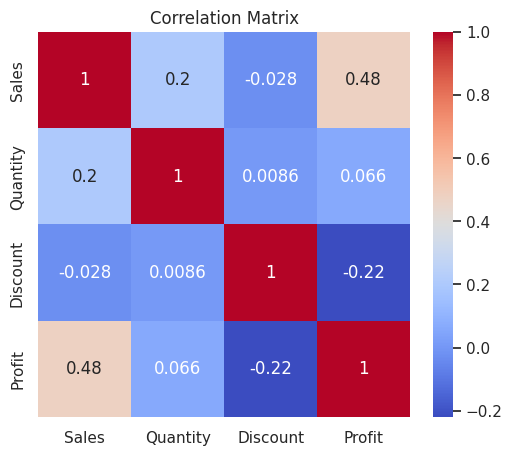

In [16]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


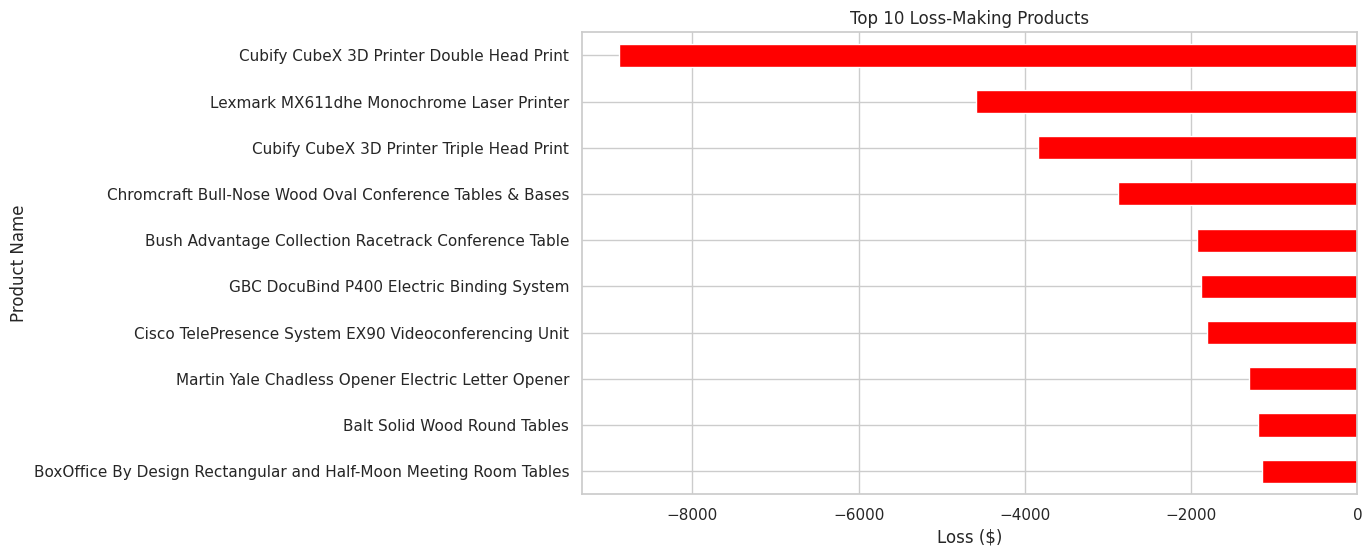

In [17]:
loss_makers = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

loss_makers.plot(kind='barh', figsize=(10,6), color='red')
plt.title("Top 10 Loss-Making Products")
plt.xlabel("Loss ($)")
plt.gca().invert_yaxis()
plt.show()


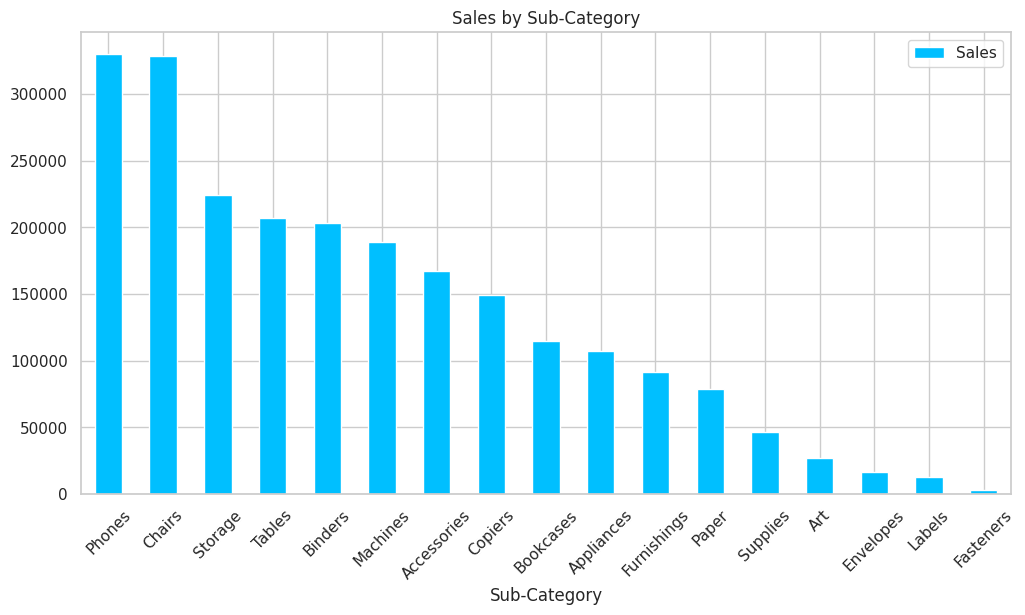

In [18]:
# Sub-Category Contribution
subcat = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

subcat[['Sales']].plot(kind='bar', figsize=(12,6), color='deepskyblue')
plt.title("Sales by Sub-Category")
plt.xticks(rotation=45)
plt.show()


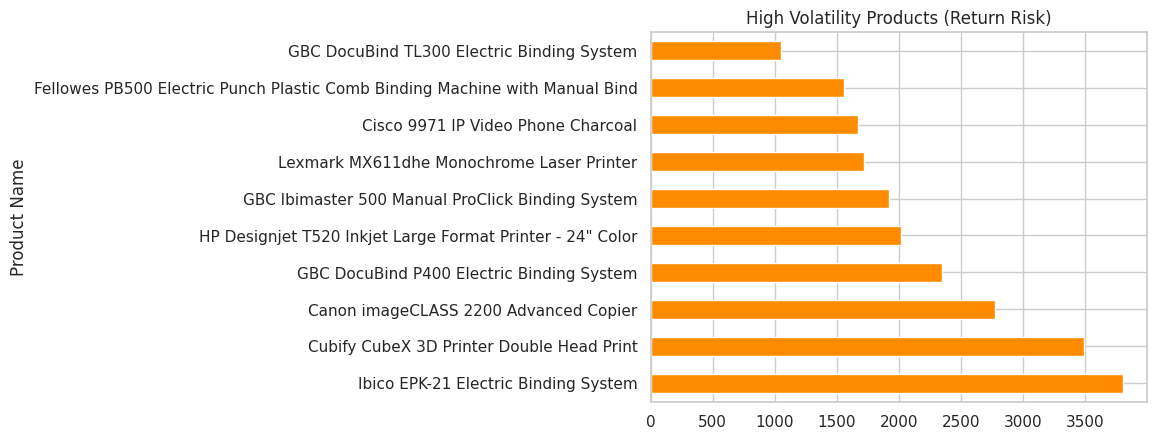

In [23]:
volatility = df.groupby('Product Name')['Profit'].std().sort_values(ascending=False).head(10)
volatility.plot(kind='barh', title="High Volatility Products (Return Risk)", color='darkorange')
plt.show()


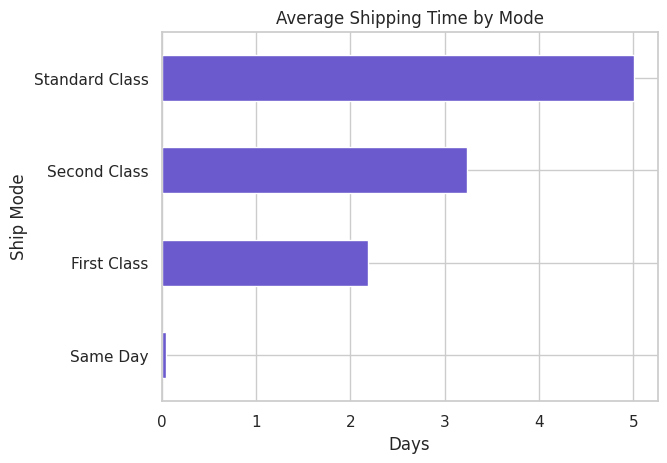

In [28]:
ship_perf = df.groupby('Ship Mode')['Shipping Time'].mean().sort_values()
ship_perf.plot(kind='barh', color='slateblue', title="Average Shipping Time by Mode")
plt.xlabel("Days"); plt.show()


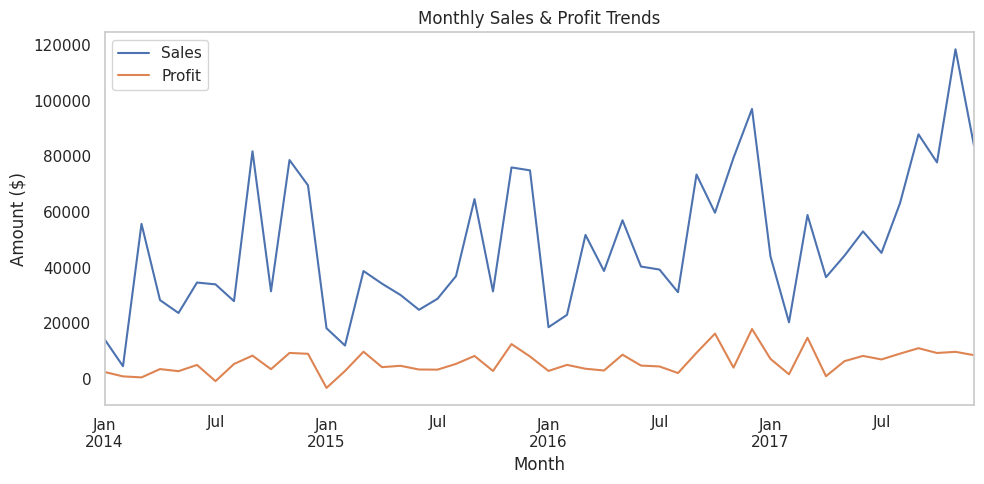

In [29]:
monthly_trend = df.groupby(df['Order Date'].dt.to_period('M')).agg({'Sales': 'sum', 'Profit': 'sum'})
monthly_trend.index = monthly_trend.index.to_timestamp()

monthly_trend.plot(figsize=(10,5), title='Monthly Sales & Profit Trends')
plt.ylabel("Amount ($)"); plt.xlabel("Month")
plt.grid(); plt.tight_layout(); plt.show()


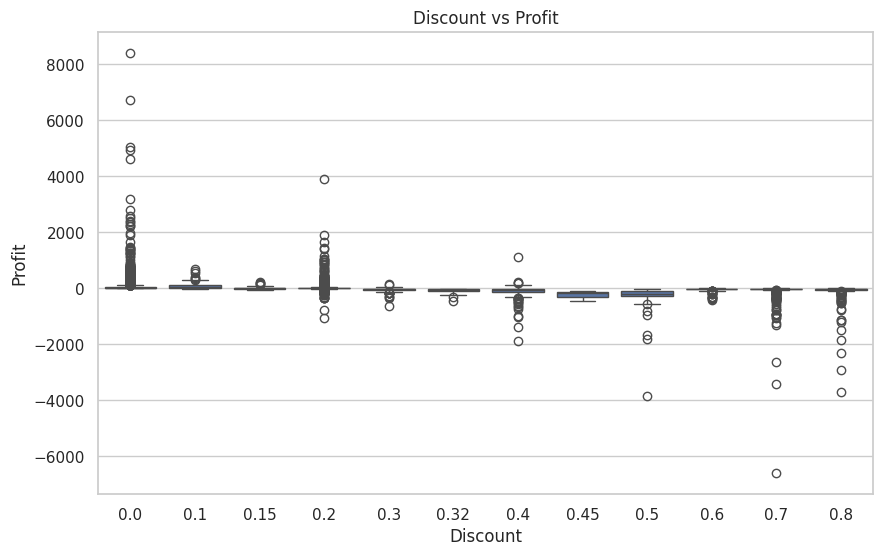

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()


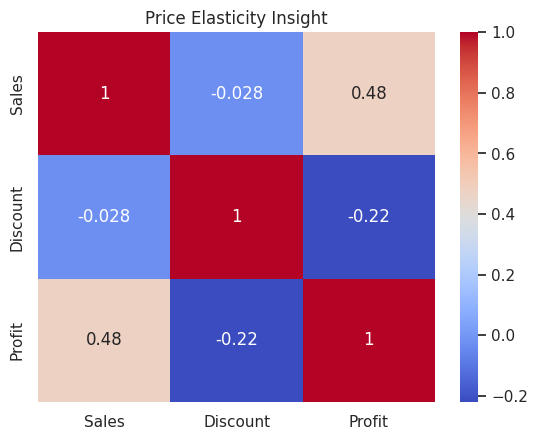

In [25]:
corr = df[['Sales', 'Discount', 'Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Price Elasticity Insight")
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkv15mngi/ysm5_6f2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkv15mngi/iiofq9p7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16614', 'data', 'file=/tmp/tmpkv15mngi/ysm5_6f2.json', 'init=/tmp/tmpkv15mngi/iiofq9p7.json', 'output', 'file=/tmp/tmpkv15mngi/prophet_modelot_v4zem/prophet_model-20250524100908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:09:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:09:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


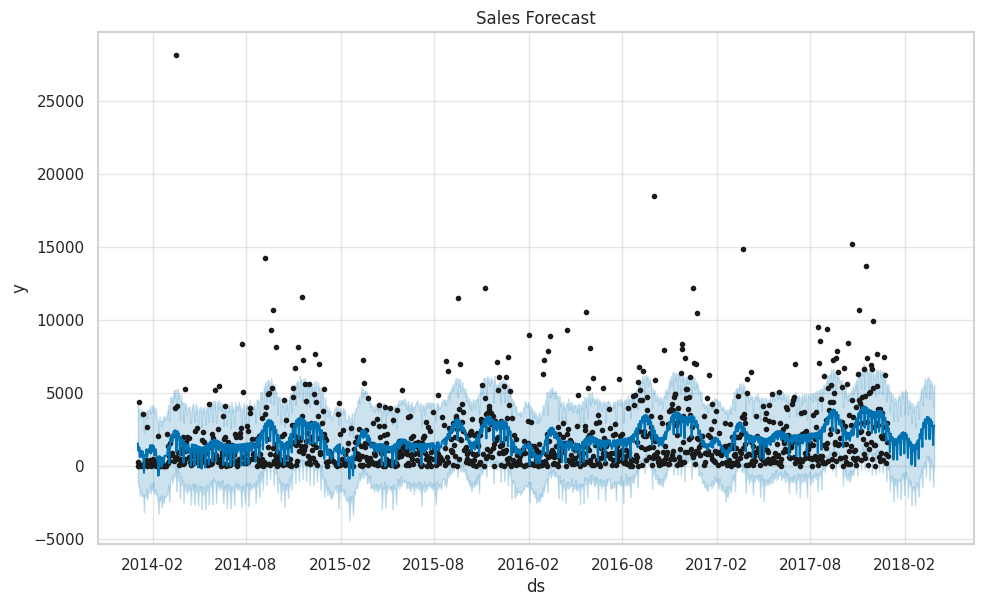

In [26]:
sales_time = df.groupby('Order Date')[['Sales']].sum().reset_index()
sales_time.columns = ['ds', 'y']

model = Prophet()
model.fit(sales_time)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Sales Forecast")
plt.show()


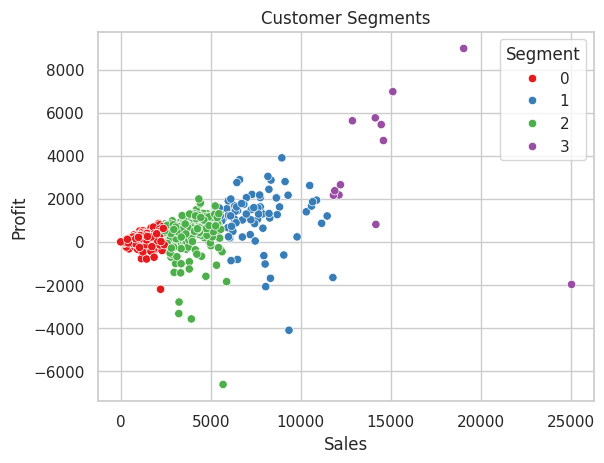

In [27]:
segment_data = df.groupby('Customer ID').agg({'Sales':'sum', 'Profit':'sum', 'Discount':'mean'}).reset_index()
X = segment_data[['Sales', 'Profit', 'Discount']]

kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
segment_data['Segment'] = kmeans.labels_

sns.scatterplot(data=segment_data, x='Sales', y='Profit', hue='Segment', palette='Set1')
plt.title("Customer Segments")
plt.show()


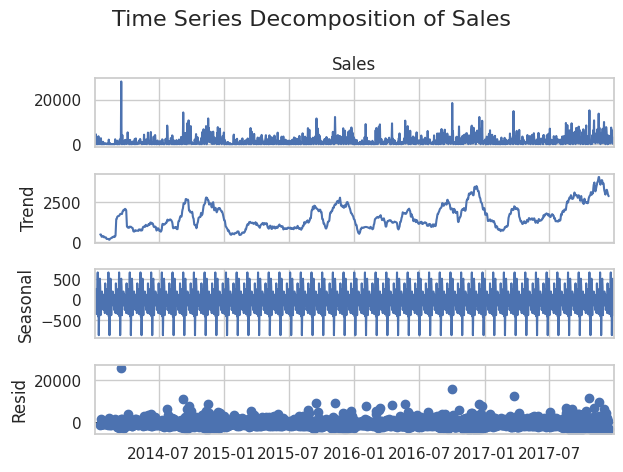

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Order Date as datetime and index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df_ts = df.groupby('Order Date')['Sales'].sum().resample('D').sum()

# Fill missing days with 0
df_ts = df_ts.fillna(0)

# Decompose time series
result = seasonal_decompose(df_ts, model='additive', period=30)  # roughly monthly seasonality

# Plot the decomposition
result.plot()
plt.suptitle("Time Series Decomposition of Sales", fontsize=16)
plt.tight_layout()
plt.show()


In [37]:
import datetime as dt

# Define snapshot date (usually day after the last transaction)
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

# Group by customer
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Assign RFM scores (1=worst, 5=best)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# Create RFM segment
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

# Show top customers
rfm.sort_values('RFM_Score', ascending=False).head(10)


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
AI-10855,14,10,4375.7860,5,5,5,555,15
AH-10210,7,9,4805.3440,5,5,5,555,15
HM-14860,3,10,8236.7648,5,5,5,555,15
JG-15160,2,11,6366.3920,5,5,5,555,15
GZ-14470,8,9,4355.1500,5,5,5,555,15
BF-11170,17,11,5907.9720,5,5,5,555,15
SM-20950,26,12,5563.3920,5,5,5,555,15
EP-13915,13,17,5478.0608,5,5,5,555,15
SE-20110,10,11,12209.4380,5,5,5,555,15


Shipping Delay Summary (in days):
count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Delay, dtype: float64


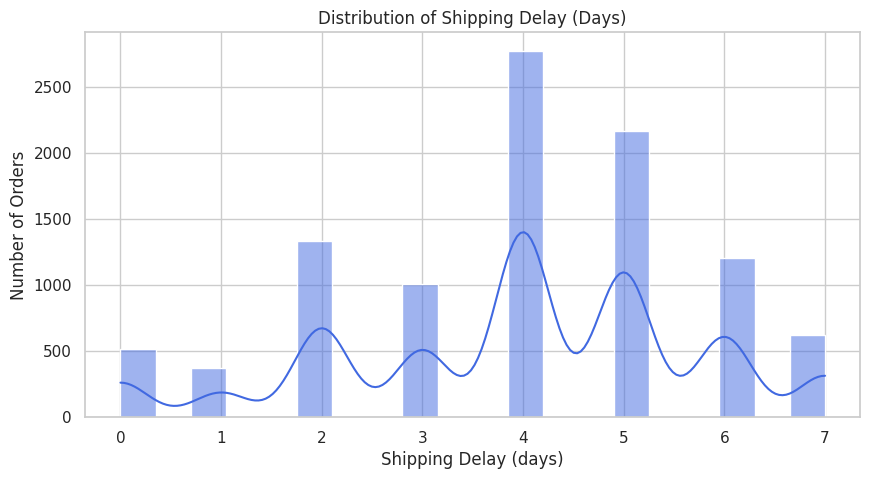

Average Shipping Delay by Ship Mode:
Ship Mode
First Class       2.182705
Same Day          0.044199
Second Class      3.238046
Standard Class    5.006535
Name: Shipping Delay, dtype: float64


In [38]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate shipping delay in days
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

# Summary stats
print("Shipping Delay Summary (in days):")
print(df['Shipping Delay'].describe())

# Visualize delay distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['Shipping Delay'], bins=20, kde=True, color='royalblue')
plt.title('Distribution of Shipping Delay (Days)')
plt.xlabel('Shipping Delay (days)')
plt.ylabel('Number of Orders')
plt.show()

# Average delay by Ship Mode
avg_delay_shipmode = df.groupby('Ship Mode')['Shipping Delay'].mean()
print("Average Shipping Delay by Ship Mode:")
print(avg_delay_shipmode)
